# Deep learning model for multi-label classification

Using scikit-learn to generate a multilabel classification dataset for us:

In [ ]:
# example of a multi-label classification task
from sklearn.datasets import make_multilabel_classification
# define dataset
X, y = make_multilabel_classification(n_samples=1000, n_features=10, n_classes=3, n_labels=2, random_state=1)
# summarize dataset shape
print(X.shape, y.shape)
# summarize first few examples
for i in range(10):
    print(X[i], y[i])

We will define a Multilayer Perceptron (MLP) model for the multi-label classification task.

Each sample has 10 inputs and three outputs; therefore, the network requires an input layer that expects 10 inputs specified via the “input_dim” argument in the first hidden layer and three nodes in the output layer.

We will use the popular ReLU activation function in the hidden layer. The hidden layer has 20 nodes that author chose after some trial and error. We will fit the model using binary cross-entropy loss and the Adam version of stochastic gradient descent.

In [ ]:
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score

# define the model
def get_model(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(20, # nodes in the hidden layer
                    input_dim=n_inputs,
                    kernel_initializer='he_uniform', 
                    activation='relu'))
    model.add(Dense(n_outputs, 
                    activation='sigmoid'))
    model.compile(loss='binary_crossentropy', 
                  optimizer='adam')
    return model

get_model(10,3)

We will evaluate the MLP model on the multi-output regression task using repeated k-fold cross-validation with 10 folds and three repeats.

The MLP model will predict the probability for each class label by default. This means it will predict three probabilities for each sample. These can be converted to crisp class labels by rounding the values to either 0 or 1.
```
# make a prediction on the test set
yhat = model.predict(X_test)
# round probabilities to class labels
yhat = yhat.round()
# calculate accuracy
acc = accuracy_score(y_test, yhat)
```
The scores are collected and can be summarized by reporting the mean and standard deviation across all repeats and cross-validation folds.

The `evaluate_model()` function below takes the dataset, evaluates the model, and returns a list of evaluation scores, in this case, accuracy scores.

In [ ]:
# evaluate a model using repeated k-fold cross-validation
def evaluate_model(X, y):
    results = list()
    n_inputs, n_outputs = X.shape[1], y.shape[1]
    # define evaluation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # enumerate folds
    for train_ix, test_ix in cv.split(X):
        # prepare data
        X_train, X_test = X[train_ix], X[test_ix]
        y_train, y_test = y[train_ix], y[test_ix]
        # define model
        model = get_model(n_inputs, n_outputs)
        # fit model
        model.fit(X_train, y_train, verbose=0, epochs=100)
        # make a prediction on the test set
        yhat = model.predict(X_test)
#        print(yhat)
        # round probabilities to class labels
        yhat = yhat.round()
        # calculate accuracy
        acc = accuracy_score(y_test, yhat)
        # store result
        print('>%.3f' % acc)
        results.append(acc)
    return results

Here's a concrete example:

In [ ]:
# load dataset
X, y = make_multilabel_classification(n_samples=1000, n_features=10, n_classes=3, n_labels=2, random_state=1)
# evaluate model
results = evaluate_model(X, y)
# summarize performance
print('Accuracy: %.3f (%.3f)' % (mean(results), std(results)))

# Using Scikit-Learn's automodel, plus playing around with plotting

In [ ]:
from sklearn.datasets import make_multilabel_classification
from sklearn.preprocessing import MultiLabelBinarizer

X, Y = make_multilabel_classification(n_samples=3, random_state=0,
                                      return_indicator=False)
MultiLabelBinarizer().fit_transform(Y)

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X, y = iris.data, iris.target
predarray = OneVsRestClassifier(LinearSVC(random_state=0)).fit(X, y).predict(X)
# print(f'X:{X}')
# print(f'y:{y}')
# print(numpy.corrcoef(y,predarray))

In [ ]:
import warnings
warnings.filterwarnings("ignore")

X, y = iris.data, iris.target
y = list(y)
for i in range(len(y)):
    if (y[i] == 0):
        y[i] = ("Iris-Setosa,",)
    elif (y[i] == 1):
        y[i] = ("Iris-Versicolour,",)
    elif (y[i] == 2):
        y[i] = ("Iris-Virginica,",)

ymlb = MultiLabelBinarizer()
yfit = ymlb.fit_transform(y)

def train_on_first_n_samples(n):
    print(f'hello: {n}')
    predarray = OneVsRestClassifier(LinearSVC(random_state=0)).fit(X[:n], yfit[:n]).predict(X)
    sum = 0
    for i in range(len(yfit)):
        if (np.array_equal(yfit[i],predarray[i])):
            sum+=1
    return(sum/len(y))

def train_on_last_n_samples(n):
    print(f'Trained on last {len(y)-n} samples:')
    predarray = OneVsRestClassifier(LinearSVC(random_state=1)).fit(X[n:], yfit[n:]).predict(X)
    sum = 0
    for i in range(len(yfit)):
        if (np.array_equal(yfit[i],predarray[i])):
            sum+=1
    return(sum/len(y))

# for j in range(1,len(y)):
#     print(train_on_last_n_samples(j))

In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pylab as pl

from sklearn.datasets import make_multilabel_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelBinarizer
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA


def plot_hyperplane(clf, min_x, max_x, linestyle, label):
    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min_x - 5, max_x + 5)  # make sure the line is long enough
    yy = a * xx - (clf.intercept_[0]) / w[1]
    pl.plot(xx, yy, linestyle, label=label)


def plot_subfigure(X, Y, subplot, x_axis_trait, y_axis_trait):
    #X = CCA(n_components=2).fit(X, Y).transform(X)

    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])

    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])

    classif = OneVsRestClassifier(SVC(kernel='linear'))
    classif.fit(X, Y)
#    classif.predict()

    pl.subplot(2, 3, subplot)

    setosa = np.where(Y[:, 0])
    versicolour = np.where(Y[:, 1])
    virginica = np.where(Y[:, 2])

    pl.scatter(X[setosa, x_axis_trait], X[setosa, y_axis_trait],
               s=50, c='red', label='Iris Setosa')
    pl.scatter(X[versicolour, x_axis_trait], X[versicolour, y_axis_trait],
               s=50, c='green', label='Iris Versicolour')
    pl.scatter(X[virginica, x_axis_trait], X[virginica, y_axis_trait],
               s=50, c='blue', label='Iris Virginica')
    

#     plot_hyperplane(classif.estimators_[0], min_x, max_x, 'k--',
#                     'Boundary\nfor class 1')
#     plot_hyperplane(classif.estimators_[1], min_x, max_x, 'k-.',
#                     'Boundary\nfor class 2')
    pl.xticks(())
    pl.yticks(())

    pl.xlim(min_x - .5 * max_x, max_x + .5 * max_x)
    pl.ylim(min_y - .5 * max_y, max_y + .5 * max_y)
    pl.legend(loc="best")


pl.figure(figsize=(14, 9))
plot_subfigure(X, yfit, 1, 0, 1)
plot_subfigure(X, yfit, 2, 0, 2)
plot_subfigure(X, yfit, 3, 0, 3)
plot_subfigure(X, yfit, 4, 1, 2)
plot_subfigure(X, yfit, 5, 1, 3)
plot_subfigure(X, yfit, 6, 2, 3)

pl.subplots_adjust(.04, .02, .97, .94, .09, .2)
pl.show()

In [ ]:
def plot_subfigure(X, Y, subplot, x_axis_trait, y_axis_trait):
    #X = CCA(n_components=2).fit(X, Y).transform(X)

    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])

    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])

    classif = OneVsRestClassifier(SVC(kernel='linear'))
    classif.fit(X, Y)
#    classif.predict()

    pl.subplot(2, 3, subplot)

    zero_class = np.where(Y[:, 0])
    one_class = np.where(Y[:, 1])
    #two_class = np.where(Y[:, 2])
    #three_class = np.where(Y[:, 3])

    pl.scatter(X[zero_class, x_axis_trait], X[zero_class, y_axis_trait],
               s=40, c='red', label='zero class')
    pl.scatter(X[one_class, x_axis_trait], X[one_class, y_axis_trait],
               s=80, edgecolors='green',
               facecolors='none', linewidths=2, label='one class')
#     pl.scatter(X[two_class, x_axis_trait], X[two_class, y_axis_trait],
#                s=160, edgecolors='b',
#                facecolors='none', linewidths=2, label='two class')
#     pl.scatter(X[three_class, x_axis_trait], X[three_class, y_axis_trait],
#                s=320, edgecolors='orange',
#                facecolors='none', linewidths=2, label='three class')

#     plot_hyperplane(classif.estimators_[0], min_x, max_x, 'k--',
#                     'Boundary\nfor class 1')
#     plot_hyperplane(classif.estimators_[1], min_x, max_x, 'k-.',
#                     'Boundary\nfor class 2')
    pl.xticks(())
    pl.yticks(())

    pl.xlim(min_x - .5 * max_x, max_x + .5 * max_x)
    pl.ylim(min_y - .5 * max_y, max_y + .5 * max_y)
    pl.legend(loc="best")

In [ ]:
from sklearn.datasets import make_multilabel_classification
from sklearn.preprocessing import MultiLabelBinarizer

X, Y = make_multilabel_classification(n_samples=1000,
                                      n_features=20,
                                      n_classes=4,
                                      n_labels=2,
                                      allow_unlabeled=False,
                                      random_state=0)

def train_on_first_n_samples(n):
    print(f'Trained on first {n} samples:')
    predarray = OneVsRestClassifier(LinearSVC(random_state=1)).fit(X[:n], Y[:n]).predict(X[n:])
    sum = 0
    for i in range(len(predarray)):
        if (np.array_equal(Y[i+n],predarray[i])):
            sum+=1
    return(sum/len(predarray))

In [ ]:
X, Y = make_multilabel_classification(n_samples=1000,
                                      n_features=2,
                                      n_classes=4,
                                      n_labels=2,
                                      allow_unlabeled=False,
                                      random_state=0)

In [ ]:
def plot_hyperplane(clf, min_x, max_x, linestyle, label):
    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min_x - 5, max_x + 5)  # make sure the line is long enough
    yy = a * xx - (clf.intercept_[0]) / w[1]
    pl.plot(xx, yy, linestyle, label=label)


def plot_subfigure(X, Y, subplot, title, transform):
    if transform == "pca":
        X = PCA(n_components=2).fit_transform(X)
    elif transform == "cca":
        X = CCA(n_components=2).fit(X, Y).transform(X)
    else:
        raise ValueError

    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])

    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])

    classif = OneVsRestClassifier(SVC(kernel='linear'))
    classif.fit(X, Y)

    pl.subplot(2, 2, subplot)
    pl.title(title)

    zero_class = np.where(Y[:, 0])
    one_class = np.where(Y[:, 1])
    pl.scatter(X[:, 0], X[:, 1], s=40, c='gray')
    pl.scatter(X[zero_class, 0], X[zero_class, 1], s=160, edgecolors='b',
               facecolors='none', linewidths=2, label='Class 1')
    pl.scatter(X[one_class, 0], X[one_class, 1], s=80, edgecolors='orange',
               facecolors='none', linewidths=2, label='Class 2')

    plot_hyperplane(classif.estimators_[0], min_x, max_x, 'k--',
                    'Boundary\nfor class 1')
    plot_hyperplane(classif.estimators_[1], min_x, max_x, 'k-.',
                    'Boundary\nfor class 2')
    pl.xticks(())
    pl.yticks(())

    pl.xlim(min_x - .5 * max_x, max_x + .5 * max_x)
    pl.ylim(min_y - .5 * max_y, max_y + .5 * max_y)
    if subplot == 2:
        pl.xlabel('First principal component')
        pl.ylabel('Second principal component')
        pl.legend(loc="upper left")


pl.figure(figsize=(8, 6))
plot_subfigure(X, Y, 1, "Without unlabeled samples + CCA", "cca")

pl.subplots_adjust(.04, .02, .97, .94, .09, .2)
pl.show()

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
iris = load_iris()
cross_val_score(clf, iris.data, iris.target, cv=10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 1.        , 1.        , 1.        ])

In [2]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

# Visualizations

Text(0.05, 0.95, "['keyword', 'tabular', 'compressed', 'netcdf', 'c-code', 'jsonxml', 'python', 'empty', 'executable', 'images']")

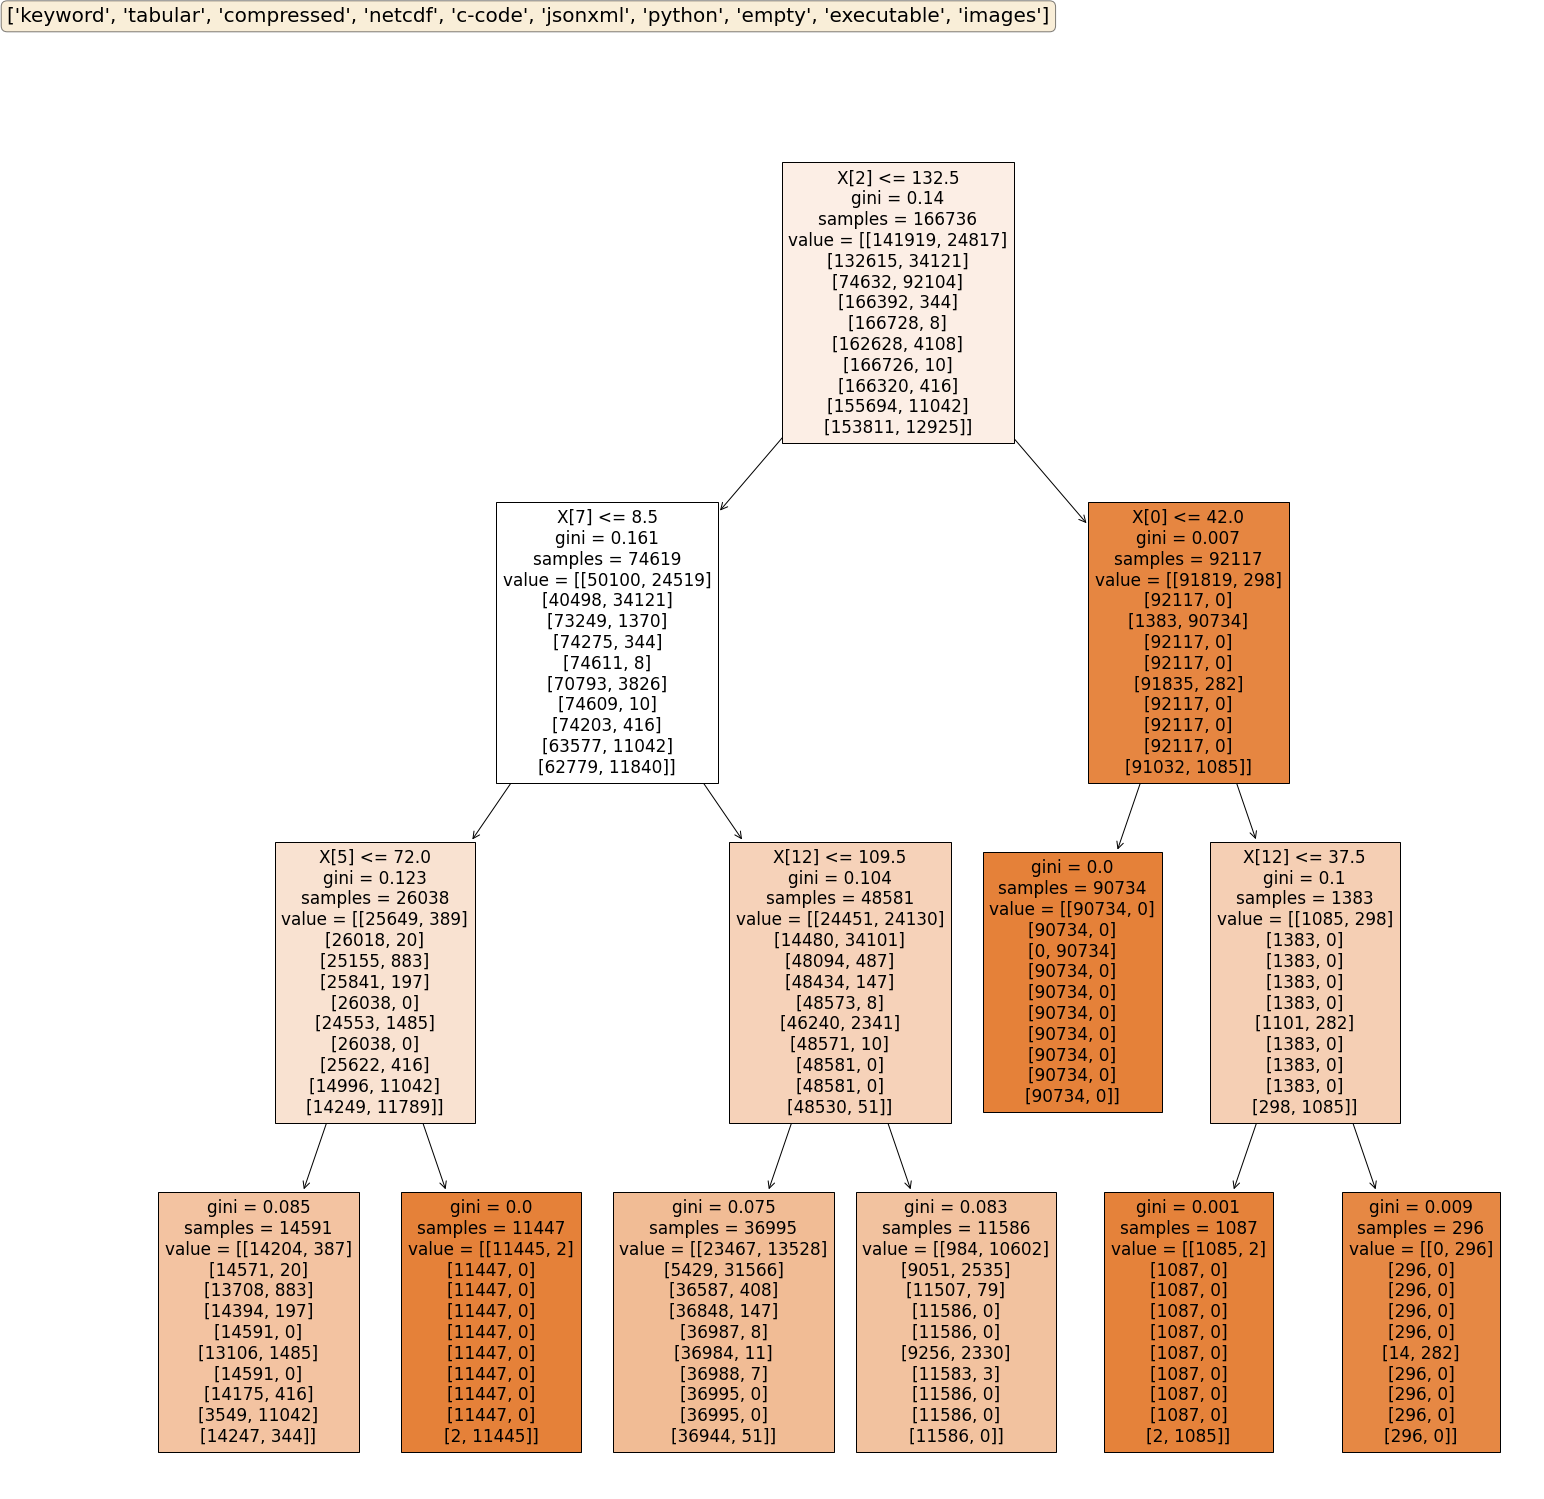

In [4]:
import os
from matplotlib import pyplot as plt
from sklearn import tree
import numpy as np
import pickle

# --- fill these in to specify which pickle should be opened ---
file = "tyler_dtc-head-16-cdiac_multilabel_gt_copy.csv-2022-03-03-09.31.17.pkl"
classifier_name = file.split("-")[0]
# --------------------------------------------------------------

os.chdir('../XtractPredictor/')
classifier = pickle.load(open(f"stored_models/trained_classifiers/{classifier_name}/{file}", "rb"))
# labelfile_name = file.replace(".pkl", ".txt")
# labels = open(f"/Users/tylergroshong/xtract/XtractPredictor/stored_models/trained_classifier_labels/{classifier}_labels/{labelfile_name}", "r").readlines()
os.chdir('../xtract-research-notebooks/')

fig = plt.figure(figsize=(25, 25))
_ = tree.plot_tree(classifier.model,
                   filled=True)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
fig.text(0.05, 0.95, classifier.unique_labels, fontsize=20,
        verticalalignment='top', bbox=props)

In [133]:
import math
from pandas import DataFrame

y_pred = classifier.model.predict(classifier.X_test)
# for i in range(10):
#     print(f'X_test[{i}]: {classifier.X_test[i]}')
#     print(f'y_pred[{i}]: {y_pred[i]}')

unique_rows = np.unique(y_pred, axis=0)
unique_dict = {}
for unique_row in unique_rows:
    labels = []
    for item in zip(unique_row, classifier.unique_labels):
        if item[0]:
            labels.append(item[1])
    unique_dict[", ".join(labels)] = unique_row

large_dict = {}
for key in unique_dict.keys():
    large_dict[key] = []

# for key in unique_dict.keys():
#     print('bar')
#     print(key)
#     print(large_dict[key])

for i in range(1000):#range(len(classifier.X_test)):#
    for key in unique_dict.keys():
        if np.all(y_pred[i]==unique_dict[key]):
            large_dict[key].append(classifier.X_test[i].tolist())#, axis=0)
    
for key in large_dict.keys():
    print(key)
    print(large_dict[key])


print('foo')
for key in large_dict.keys():
#     print(key)
    lst = large_dict[key]
#     print(lst)
    lst = [list(x) for x in zip(*lst)]
    lst = [sum(x)/len(x) for x in lst]
    large_dict[key] = lst

heatlists = [large_dict[key] for key in large_dict.keys()]
for i in range(len(heatlists)):
    if (len(heatlists[i])==0):
        heatlists[i] = [0.0] * 16

# plt.bar(lst[0], 100)

# n, bins, patches = plt.hist(lst, facecolor='g', alpha=0.75)
# plt.xlabel('Smarts')
# plt.ylabel('Probability')
# plt.title('Histogram of IQ')
# # plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# # plt.xlim(40, 160)
# # plt.ylim(0, 0.03)
# plt.grid(True)

images
[[255.0, 216.0, 255.0, 224.0, 0.0, 16.0, 74.0, 70.0, 73.0, 70.0, 0.0, 1.0, 1.0, 1.0, 0.0, 72.0], [71.0, 73.0, 70.0, 56.0, 55.0, 97.0, 0.0, 4.0, 54.0, 3.0, 231.0, 0.0, 0.0, 0.0, 0.0, 0.0], [71.0, 73.0, 70.0, 56.0, 55.0, 97.0, 0.0, 4.0, 54.0, 3.0, 231.0, 0.0, 0.0, 0.0, 0.0, 0.0], [71.0, 73.0, 70.0, 56.0, 55.0, 97.0, 0.0, 4.0, 54.0, 3.0, 231.0, 0.0, 0.0, 0.0, 0.0, 0.0], [71.0, 73.0, 70.0, 56.0, 55.0, 97.0, 0.0, 4.0, 54.0, 3.0, 231.0, 0.0, 0.0, 0.0, 0.0, 0.0], [71.0, 73.0, 70.0, 56.0, 55.0, 97.0, 0.0, 4.0, 54.0, 3.0, 231.0, 0.0, 0.0, 0.0, 0.0, 0.0], [71.0, 73.0, 70.0, 56.0, 55.0, 97.0, 0.0, 4.0, 54.0, 3.0, 231.0, 0.0, 0.0, 0.0, 0.0, 0.0], [71.0, 73.0, 70.0, 56.0, 55.0, 97.0, 0.0, 4.0, 54.0, 3.0, 231.0, 0.0, 0.0, 0.0, 0.0, 0.0], [71.0, 73.0, 70.0, 56.0, 55.0, 97.0, 0.0, 4.0, 54.0, 3.0, 231.0, 0.0, 0.0, 0.0, 0.0, 0.0], [71.0, 73.0, 70.0, 56.0, 55.0, 97.0, 0.0, 4.0, 54.0, 3.0, 231.0, 0.0, 0.0, 0.0, 0.0, 0.0], [71.0, 73.0, 70.0, 56.0, 55.0, 97.0, 0.0, 4.0, 54.0, 3.0, 231.0, 0.0, 0.0, 0.

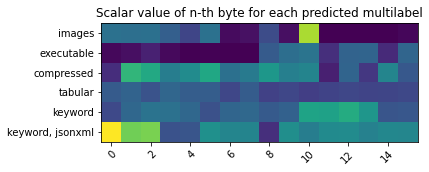

In [135]:
y_axis_labels = large_dict.keys()

heatarray = np.array(heatlists)


fig, ax = plt.subplots()
im = ax.imshow(heatarray)

# Show all ticks and label them with the respective list entries
ax.set_yticks(np.arange(len(y_axis_labels)), labels=y_axis_labels)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax.set_title("Scalar value of n-th byte for each predicted multilabel")
fig.tight_layout()
plt.show()

foo


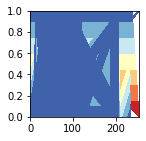

In [95]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

for pairids, pair in enumerate([[0, 2]]):
    

for pairidx, pair in enumerate([[0, 2]]):
    print('foo')
    # We only take the two corresponding features
#     X = iris.data[:, pair]
#     y = iris.target
    X = classifier.X_train[:, pair]
    y = classifier.Y_train

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

#     x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#     y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx = classifier.X_test
    yy = classifier.Y_test
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = classifier.model.predict(classifier.X_test)
#     Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx[:, :10], yy, Z, cmap=plt.cm.RdYlBu)

#     plt.xlabel(iris.feature_names[pair[0]])
#     plt.ylabel(iris.feature_names[pair[1]])

#     # Plot the training points
#     for i, color in zip(range(n_classes), plot_colors):
#         idx = np.where(y == i)
#         plt.scatter(
#             X[idx, 0],
#             X[idx, 1],
#             c=color,
#             label=iris.target_names[i],
#             cmap=plt.cm.RdYlBu,
#             edgecolor="black",
#             s=15,
#         )

# plt.suptitle("Decision surface of decision trees trained on pairs of features")
# plt.legend(loc="lower right", borderpad=0, handletextpad=0)
# _ = plt.axis("tight")